In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# %load ../../loaders/imports.py
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import time
import pdb

# Add the uoicorr directory to the path
sys.path.append('../../../uoicorr_run')

# Add the root directory of this repository
sys.path.append('../..')

from dchisq import DChiSq

In [172]:
dx2 = DChiSq(0.3, 0.1, 5000, 500)
p = dx2.nPDF(np.linspace(1200, 1800, 200))

In [177]:
c = dx2.nCDF(np.linspace(1200, 1800, 200))

In [164]:
# Compare to Monte Carlo
n_samples = int(1e7)
samples = np.zeros(n_samples)
for i in range(n_samples):
    
    samples[i] = 0.3 * np.random.chisquare(5000) - 0.1 * np.random.chisquare(500)

In [165]:
np.mean(samples)

1449.9975674139332

(array([3.04989262e-07, 2.77509107e-05, 6.41526241e-04, 4.75141527e-03,
        1.17812497e-02, 1.02700435e-02, 3.24918443e-03, 3.82525002e-04,
        1.70202681e-05, 3.32998480e-07]),
 array([1293.15232777, 1325.28460654, 1357.41688531, 1389.54916408,
        1421.68144285, 1453.81372162, 1485.94600038, 1518.07827915,
        1550.21055792, 1582.34283669, 1614.47511546]),
 <a list of 10 Patch objects>)

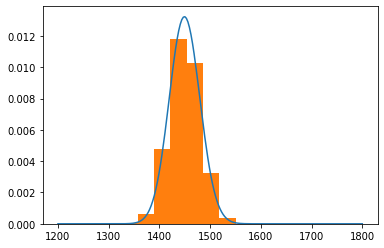

In [176]:
plt.plot(np.linspace(1200, 1800, 200), p)
plt.hist(samples, density=True)

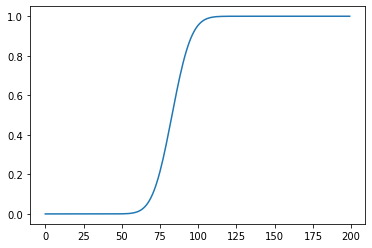

In [178]:
plt.plot(c)

In [184]:
# Concentration of measure phenomenon, logarithmic scaling:

p = np.logspace(2, 5, 10)
T = np.log(p)
n = p

n_samples = 200

pdfs = np.zeros((p.size, n_samples))
means = np.zeros(p.size)
variances = np.zeros(p.size)
    
for i, p_ in enumerate(p):
    
    dx2 = DChiSq(0.5, 0.5, n[i] - T[i], T[i])
    means[i] = dx2.mean()
    variances[i] = dx2.variance()    
    
    domain = np.linspace(dx2.mean() - np.sqrt(dx2.variance()), dx2.mean() + np.sqrt(dx2.variance()), n_samples)
    pdfs[i, :] = dx2.nPDF(domain)
    

In [187]:
variances

array([5.49136783e+01, 1.41080865e+02, 3.51542310e+02, 8.57504774e+02,
       2.05962342e+03, 4.88959761e+03, 1.15023217e+04, 2.68583884e+04,
       6.23302110e+04, 1.43895000e+05])

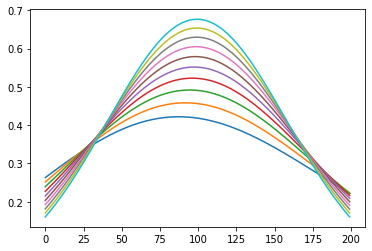

In [188]:
# Plot the Z-scored PDFs ??:
for i in range(pdfs.shape[0]):
    
    plt.plot(pdfs[i, :] * np.sqrt(variances[i]))
    

In [ ]:
# Let's start simple --> just evaluate the CDF at 0